# Esteban Marulanda Ardila

# Modelo de Ising 2-D

In [1]:
#Librerias
import numpy as np
import matplotlib
from numba import jit,prange
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from sympy.utilities.iterables import multiset_permutations
import collections
import time

#Funciones a utilizar

def combinacion(n, N):  # n es la combinación deseada, hay 2**N-1 combinaciones (n empieza desde 0)
    
    microe= np.empty(N)  # N es la cantidad de spins
    for i in range(N):
        microe[N-1-i] = 1 if (n % 2) else -1  #-1 si n%2=0,  1 si n%2=1
        n = n // 2
    return microe


def etiqueta_vecino(L): #Condiciones de frontera periodicas, devuelve array con etiquetas de vecinos
    N = L * L
    return [[(i + 1) % L + (i // L) * L, (i - 1) % L + (i // L) * L, (i - L) % N, (i + L) % N] for i in range(N)]


def energiaspinj(microestado, j, etivecino): #Calcula la energía relacionada a un spin particular
    #array son las etiquetas correspondientes a los vecinos proximos del spin j
    suma = 0
    for k in etivecino:
        if j < k: #Evita contar dos veces
            suma += microestado[k]
    return suma

def micro(L):
    
    pos_energias = etiqueta_vecino(L)  #Matriz con  etiquetas de los vecinos
    
    N=L*L  
    
    energia_micros = np.empty(2**N) # Array que contendra las 2**N energias asociadas a los microestados
    
    
    for i in range(2**N):
        
        microe = combinacion(i, N)  #microestado i-esimo
        energia = 0   # Energia correspondiente al microestado i-esimo
        
        for j in range(N):
            energia -= microe[j] * energiaspinj(microe, j, pos_energias[j]) #Se suma la contribución a la energía de cada spin.
            
        energia_micros[i] = energia 
        
     #Devuelve array con 2 arreglos, el primero las energias, el segundo la densidad
        
    return energia_micros


def Particion(T, energia):  #Metodo 1 para calcular la función partición, suma sobre todas las energía posibles incluyendo las repetidas
    
    return sum( np.exp(-energia/T))

# Función partición usando omega, suma sobre energías
def Particion2(T,energia): #Metodo 2 para calcular la función partición, suma sobre todas las energía posibles sin repetir
    # El factor de repetición se incluye fuera de la e
    Energies=np.unique(energia, return_counts=True) # Devuelve las energías y la cantidad de veces que se repiten
    particion = 0    
    for i in range(len(Energies[0])):
        particion += Energies[1][i] * np.exp(-Energies[0][i]/T) 
    return particion



def Emedia(Energias, T): #Cálculo de la energía media teniendo en cuenta la degenerancia de la energía y usando la función Particion2
    Em = 0 #Energía media
    energias=np.unique(Energias, return_counts=True)
    for i in range(len(energias[0])):
        Em += energias[0][i] *energias[1][i] * np.exp(-energias[0][i]/T) 
    return Em/Particion2(T,Energias)

def E2media(Energias, T): #Cálculo de la energía  cuadratica media teniendo en cuenta la degenerancia de la energía y usando la función Particion2
    Em = 0
    energias=np.unique(Energias, return_counts=True)
    for i in range(len(energias[0])):
        Em += (energias[0][i]**2) *energias[1][i] * np.exp(-energias[0][i]/T) #Sumatoria de la f. partición 
    return Em/Particion2(T,Energias)

def calorEspecifico(Energias, T, N):# Calculo del calor especifico
    return (E2media(Energias, T) - Emedia(Energias, T)**2)/(N*T**2)



def model(x,sigma,mu,A):  #Gaussiana
    y = A*np.exp(-(x-mu)**2/(2*sigma**2))
    return y    
    
def sigm(N,a,k): #Ajuste a utilizar para la desviación estandar vs número de espines
    y = a*N**(k)
    return y  



Como prueba, procedemos a calcular el tiempo de ejecución para L=4, además de imprimir la degenerancia correspondiente a cada valor de energía

In [2]:
start_time = time.time()
degenerancia = np.unique(micro(4), return_counts=True)
print ("My program took", time.time() - start_time, "to run")
print("Energía\tDegenerancia")
for i in range(degenerancia[0].size):
    print("%d\t%d" % (degenerancia[0][i], degenerancia[1][i]))

My program took 1.594226598739624 to run
Energía	Degenerancia
-32	2
-24	32
-20	64
-16	424
-12	1728
-8	6688
-4	13568
0	20524
4	13568
8	6688
12	1728
16	424
20	64
24	32
32	2


Ahora calculamos las energías correspondientes a las configuraciones L=2,3,4,5 y el tiempo de computo en segundos.

In [3]:
#Energia microestados
start_time = time.time()
micros1=micro(2) #L=2
print ("My program took", time.time() - start_time, "to run")
start_time = time.time()
micros2=micro(3) #L=3
print ("My program took", time.time() - start_time, "to run")
start_time = time.time()
micros3=micro(4) #L=4
print ("My program took", time.time() - start_time, "to run")
start_time = time.time()
micros4=micro(5) #L=5
print ("My program took", time.time() - start_time, "to run")



My program took 0.0 to run
My program took 0.006974935531616211 to run
My program took 1.6713290214538574 to run
My program took 1333.0016770362854 to run


Para estas 4 configuraciones, se realizan graficos de la densidad de estados vs la energía y se ajusta a la gaussiana definida en las funciones 'model'.

C:\Users\julie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


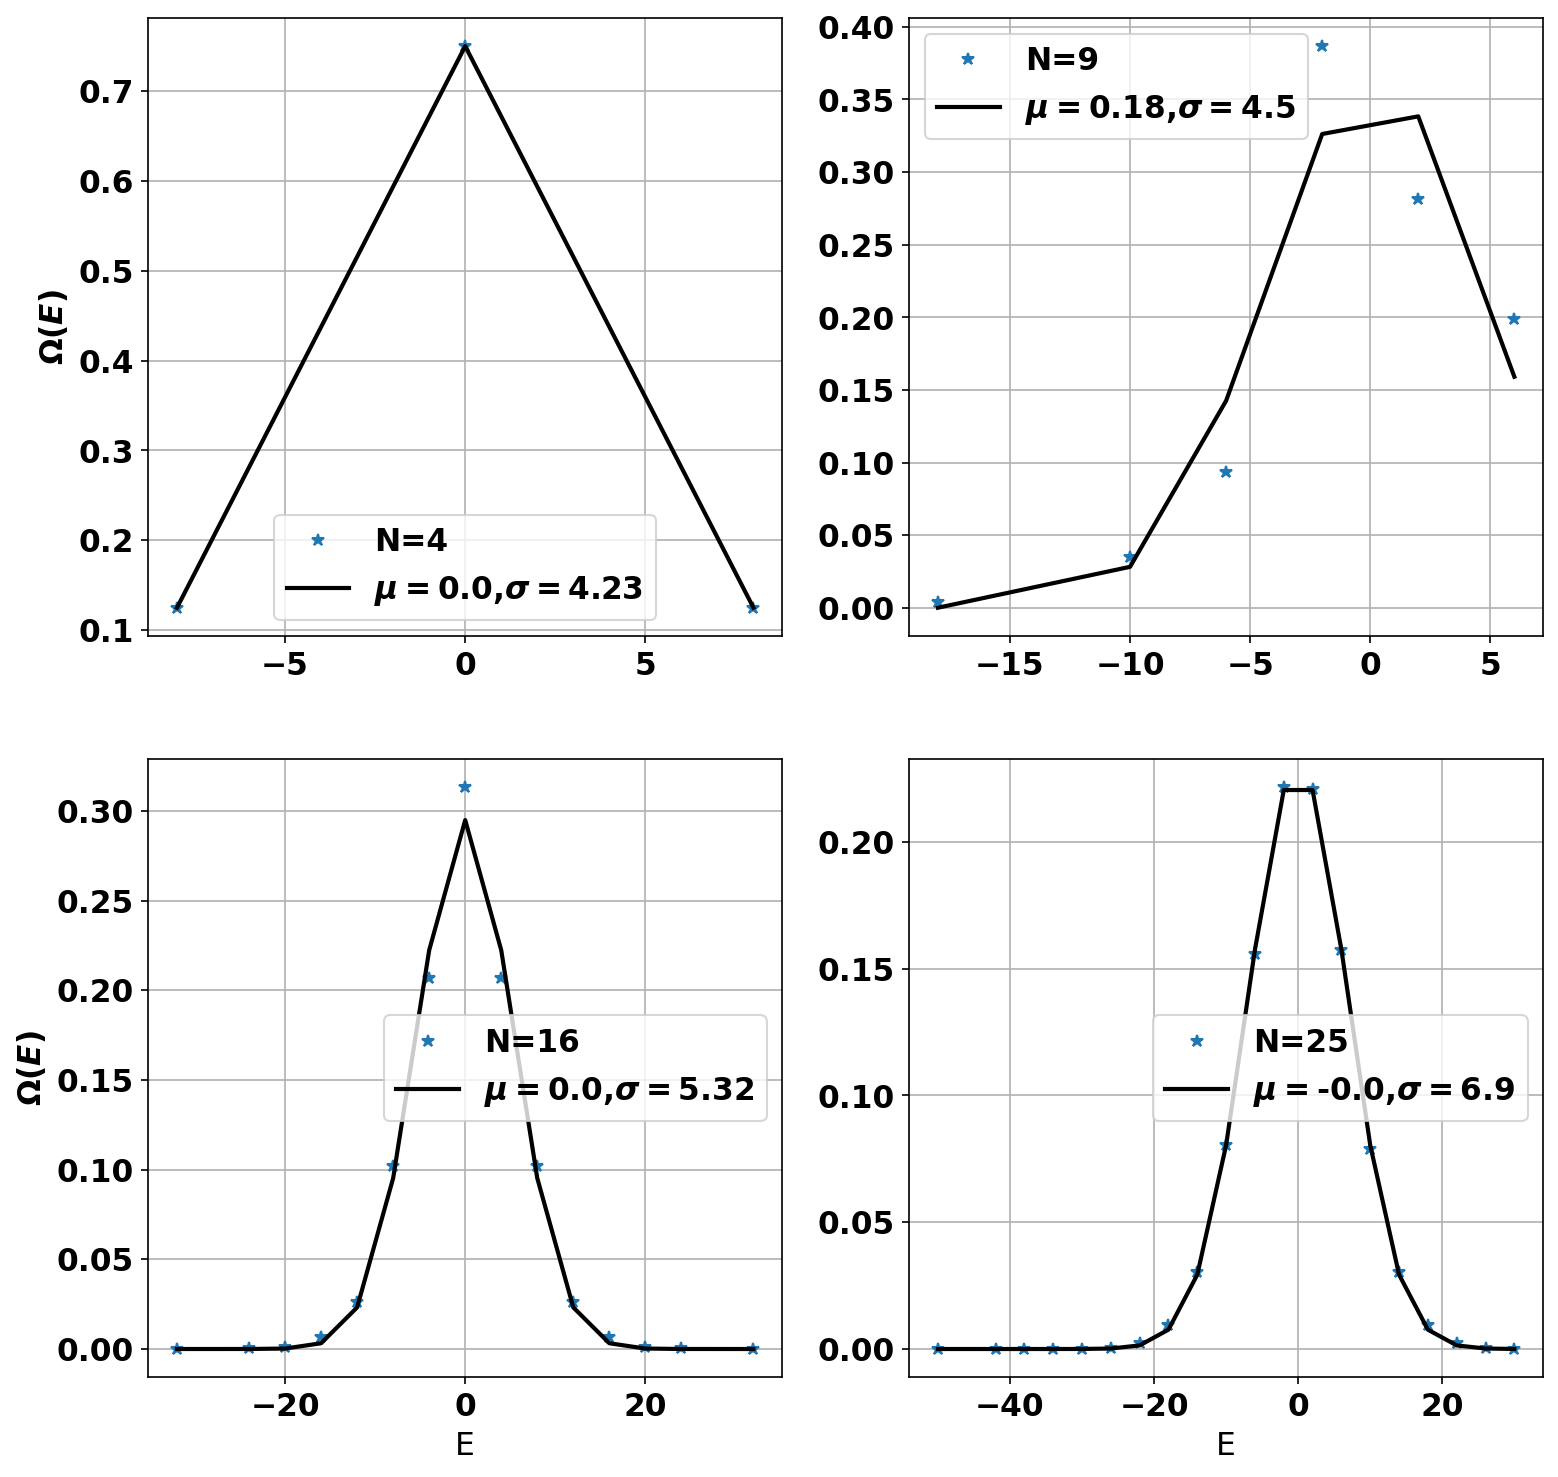

In [4]:
font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 12, 12 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=150)
plt.rcParams['figure.figsize'] = 10,10

desvi=[] #Contendra las desviaciones estandares 

for i in range(1,5):
    
    K= np.unique(eval('micros'+str(i)), return_counts=True) #Contiene en K[0] las energías sin repetir y en K[1] las veces que se repite la energía
    
    x , y = K[0] , K[1]/sum(K[1])  #En 'y' se normaliza para lograr el correspondiente ajuste de la Gaussiana
    
    mej_val, cov = curve_fit(model, x, y) #Se ajusta la gaussiana, mej_val contiene dos parametros.
    # De acuerdo a la definición de 'model', mej_val[0] es la desviación estandar y mej_val[1] la media.
    desvi.append(mej_val[0])
    #Graficos
    fig1 = plt.figure(1)
    ax1 = plt.subplot(2,2,i)
    ax1.plot(x,y,'*',label='N='+str((i+1)**2))
    ax1.plot(x,model(x,mej_val[0],mej_val[1],mej_val[2]),lw=2,color='k',label='$\mu=$'+str(round(mej_val[1],2))+','+'$\sigma=$'+str(round(mej_val[0],2)))
    if i==3 or i==4:
        plt.xlabel('E')
    if i==1 or i==3:
        plt.ylabel('$\Omega(E)$')
        
    plt.grid()
    plt.legend()

plt.show()
    
    
    


# Desviación vs N

En base a las desviaciones estandares encontradas para las cuatro configuraciones de espines estudiadas, se procede a realizar un ajuste de la forma $y=ax^k$ siendo 'y' la desviación estandar y 'x' el número de espines en cuestión, además considerando 'a' y 'k' como parametros de ajuste.

Text(0, 0.5, '$\\sigma$')

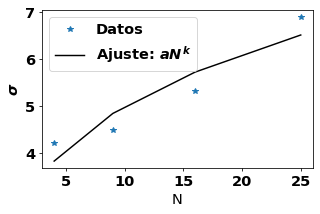

In [31]:
font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 5, 3# para modificar el tamaño de la figura
fig1 = plt.figure(dpi=70)


N=[4,9,16,25]
mej_val, cov = curve_fit(sigm, N, desvi)
plt.plot(N,desvi, '*',label='Datos')
plt.plot(N,sigm(N,mej_val[0],mej_val[1]), 'k', label='Ajuste: $aN^{k}$')
plt.legend()

plt.xlabel('N')
plt.ylabel('$\sigma$')

In [6]:
mej_val #a, k

(array([2.56617429, 0.28941479]),)

# Función partición.

Se calcula la función partición usando dos metodos:

1) $Z=\sum exp{(-\beta E_{n})}$

2) $Z=\sum \Omega(E_{n}) exp{(-\beta E_{n})}$ 

En el caso '1)' la suma involucra todas las energías correspondientes a los $2^N$ microestados, sin embargo, para el caso '2)' se tiene en cuenta el factor $\Omega(E_{n})$ el cual da cuenta de la degenerancia de la energía $\Omega(E_{n})$. El método '1)' y '2)' son implementados mediantes las funciones definidas 'Particion' y 'Particion2' respectivamente.

In [8]:
Temperaturas = [2.0, 2.5, 3.0]
print([Particion(T,micros4) for T in Temperaturas])
print([Particion2(T,micros4) for T in Temperaturas])

[274435114113.4535, 5501900618.939106, 842335440.5530702]
[274435114078.46164, 5501900619.073955, 842335440.5604907]


# Promedio de la energia



La energía promedio es:

$$<E>= \sum E_{n} exp (-\beta E_{n}) / Z = \sum \Omega(E_{n}) E_{n} exp (-\beta E_{n}) / Z$$

Calculamos esta teniendo en cuenta la degenerancia puesto que involucra sumar menor cantidad de terminos. Esta es implementada en la función 'Emedia'. Por tanto procedemos a realizar un grafico de la energía media versus la temperatura para N=16.

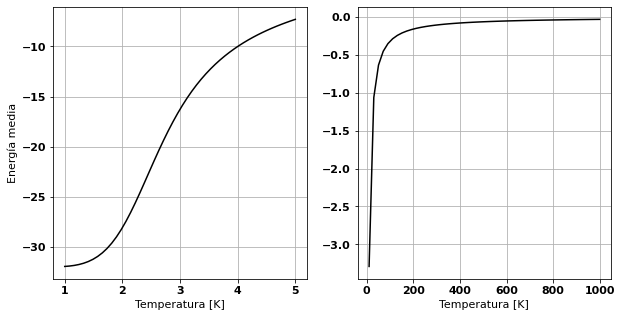

In [40]:
T1 = np.linspace(1, 5, 50) # Temperatura
T = np.linspace(10,1000, 50) # Temperatura

Energiamedia1=[] #Contendra la energía media dada una temperatura
Energiamedia=[] #Contendra la energía media dada una temperatura
 
for i in range(len(T)):
    Energiamedia1.append( Emedia(micros3, T1[i]) )
    Energiamedia.append( Emedia(micros3, T[i]) )
    
#Grafico

font = {'weight' : 'bold', 'size'   : 11}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 10, 5 # para modificar el tamaño de la figura
fig1 = plt.figure(100)
ax1 = plt.subplot(1,2,1)
ax1.plot(T1,Energiamedia1,'k')

plt.xlabel("Temperatura [K]")
plt.ylabel("Energía media")
plt.grid()

fig1 = plt.figure(100)
ax1 = plt.subplot(1,2,2)
ax1.plot(T,Energiamedia,'k')
 
plt.xlabel("Temperatura [K]")
plt.grid()


# Calor especifico a volumen constante

De la primera ley de la termodinamica, sabemos que a volumen constante $dU=dQ$. Por otro lado sabemos que $U=<E>$ y de la definición de calor especifico:

$$ c_{V}=\frac{dQ}{dT}\frac{1}{N}=\frac{d<E>}{dT}\frac{1}{N} \hspace{0.5 cm} (1) $$

Siendo $c_{V}, N $  el calor especifico a volumen constante y el número de particulas, respectivamente. Notemos lo siguiente:

$$<E>=\sum_{n} E_{n}exp(-\beta E_{n})/Z=-\frac{\frac{\mathrm{d} }{\mathrm{d} \beta}\sum_{n}exp(-\beta E_{n})}{Z}=-\frac{\frac{\mathrm{d} }{\mathrm{d} \beta}Z}{Z} \hspace{0.5 cm} (2)$$

$$<E^2>=\sum_{n} E_{n}^2 exp(-\beta E_{n})/Z=-\frac{\frac{\mathrm{d} }{\mathrm{d} \beta}\sum_{n} E_{n} exp(-\beta E_{n})}{Z}= \frac{\frac{\mathrm{d^2} }{\mathrm{d} \beta^2}\sum_{n} exp(-\beta E_{n})}{Z}= \frac{\frac{\mathrm{d^2} }{\mathrm{d} \beta^2}Z}{Z} \hspace{0.5 cm} (3)$$

Consideremos $(3)-(2)^2$:

$$\frac{\frac{\mathrm{d^2} }{\mathrm{d} \beta^2}Z}{Z}- \big(\frac{\frac{\mathrm{d} }{\mathrm{d} \beta}Z}{Z}\big)^2=\frac{\mathrm{d} }{\mathrm{d}\beta}\frac{\frac{\mathrm{d} }{\mathrm{d} \beta}Z}{Z}= -\frac{\mathrm{d} }{\mathrm{d}\beta}<E>= -\frac{\mathrm{d} }{\mathrm{d}T}<E> \frac{\mathrm{d}T }{\mathrm{d}\beta}=\frac{\mathrm{d} }{\mathrm{d}T}<E> \frac{1}{k_{B}\beta^2}=Nc_{v}\frac{1}{k_{B}\beta^2}  \hspace{0.5 cm} (4)$$

Donde hemos utilizado el hecho de que $\frac{\mathrm{d}T }{\mathrm{d}\beta}=-\frac{1}{k_{B}\beta^2}$ y (1). Por tanto de (4) despejando $c{v}$ y usando (2) y (3):

$$c_{v}=\frac{k_{B}\beta^2}{N}(<E^2>-<E>^2)$$


Por tanto, este es implementado a partir de la función 'E2media' y el calor especifico con la función 'calorEspecifico'. A continuación se realizan graficos del calor especifico vs temperatura con el fin de comparar la temperatura critica teorica con la computacional.

In [10]:
T = np.linspace(1, 5.5, 50) # Rango de temperatura
cE_2=[]
cE_3=[]
cE_4=[]
cE_5=[]

for i in range(len(T)):
    cE_2.append(calorEspecifico(micros1, T[i], 4))
    cE_3.append(calorEspecifico(micros2, T[i], 9))
    cE_4.append(calorEspecifico(micros3, T[i], 16))
    cE_5.append(calorEspecifico(micros4, T[i], 25))





In [11]:
cE_2=np.array(cE_2)
cE_3=np.array(cE_3)
cE_4=np.array(cE_4)
cE_5=np.array(cE_5)
tCriticas = [T[cE_2.argmax()], T[cE_3.argmax()], T[cE_4.argmax()], T[cE_5.argmax()]] # Temperatura correspondiente al valor máximo de calor especifico
print("Las temperatuas críticas son: ", tCriticas)

Las temperatuas críticas son:  [2.4693877551020407, 2.4693877551020407, 2.4693877551020407, 2.3775510204081636]


<Figure size 500x500 with 0 Axes>

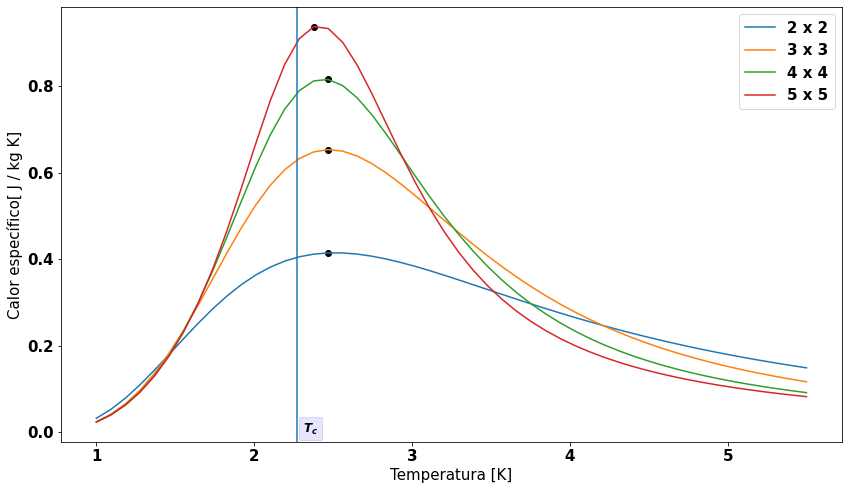

In [45]:
font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 5, 5 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=100)
plt.rcParams['figure.figsize'] = 10,10  


plt.figure(figsize=(14,8))
plt.plot(T, cE_2, label = "2 x 2")
plt.plot(T, cE_3, label = "3 x 3")
plt.plot(T, cE_4, label = "4 x 4")
plt.plot(T, cE_5, label = "5 x 5")
#plt.plot(T, cE_6, label = "6 x 6")

plt.scatter(tCriticas, [cE_2[cE_2.argmax()], cE_3[cE_3.argmax()], cE_4[cE_4.argmax()], cE_5[cE_5.argmax()]], color="black")
plt.axvline(x = 2.269)
plt.text(x=2.31, y=0, s="$T_c$", fontsize=12, bbox=dict(facecolor='blue', alpha=0.1)) # Temperatura critica teorica
plt.xlabel("Temperatura [K]")
plt.ylabel("Calor específico[ J / kg K]")
#plt.title("Calor específico vs Temperatura")
plt.legend()

# Dependencia de la Temperatura critica con el tamaño

Text(0, 0.5, '$T_{c}$')

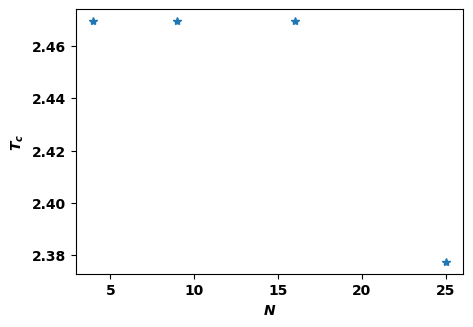

In [63]:
font = {'weight' : 'bold', 'size'   : 10}
matplotlib.rc('font', **font)

fig1 = plt.figure(dpi=100)
plt.rcParams['figure.figsize'] = 5, 3.5# para modificar el tamaño de la figura

N=[4,9,16,25]
plt.plot(N,tCriticas,'*')
plt.xlabel('$N$')
plt.ylabel('$T_{c}$')

El desarrollo teórico de Onsager cuando $L\longrightarrow \infty$ predice que $K_B T_c = 2.269 J$, con $K_B = 1 \frac{m^2 Kg}{s^2 K}$, así la temperatura crítica $T_c(L)$ para un modelo de Ising 2D cuando $L\longrightarrow \infty $ es $T_c = 2.269 K$

- http://micro.stanford.edu/~caiwei/me334/Chap12_Ising_Model_v04.pdf


# Modelo de Ising 1-D

In [64]:
def micro_print(N): #Función que imprime los 2**N microestados con su respectiva energia en la ultima columna
    #N es el número de particulas

    l = np.ones(N)
    
    a=list(multiset_permutations(l))
    
    for i in range(len(l)):
        l[i]=-1
        b=list(multiset_permutations(l))
        a=a+b
        
    for i in range(int(2**N)):
        
        s=0
        
        for j in range(len(l)):
            
            
            if j!=(len(l)-1):
                
                s+= a[i][j]*a[i][j+1]
                
            if j==(len(l)-1):

                s+= a[i][j]*a[i][0]
        
        a[i].append(-1*s)
        
    return np.array(a)



def micro(N): # N es el número de particulas
    # Esta función devuelve las 2^N energias
    
    a=[]
    
    for i in range(int(2**N)):
        
        l=combinacion(i,N)
        s=0
        
        for j in range(len(l)):
            
            
            # Primeros vecinos 
            
            if j!=(len(l)-1):
                
                s-= l[j]*l[j+1]
                
            #Condición de frontera periodica
                
            if j==(len(l)-1):

                s-= l[j]*l[0]
        
        a.append(s)
        
    return np.array(a)



In [65]:
# 6 microestados para un arreglo de 16 atomos con su correspondiente energía en la ultima columna
micro_print(16)

array([[  1.,   1.,   1., ...,   1.,   1., -16.],
       [ -1.,   1.,   1., ...,   1.,   1., -12.],
       [  1.,  -1.,   1., ...,   1.,   1., -12.],
       ...,
       [ -1.,   1.,  -1., ...,  -1.,  -1., -12.],
       [  1.,  -1.,  -1., ...,  -1.,  -1., -12.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -16.]])

In [66]:
# 6 microestados para un arreglo de 20 atomos con su correspondiente energía en la ultima columna
micro_print(20)

array([[  1.,   1.,   1., ...,   1.,   1., -20.],
       [ -1.,   1.,   1., ...,   1.,   1., -16.],
       [  1.,  -1.,   1., ...,   1.,   1., -16.],
       ...,
       [ -1.,   1.,  -1., ...,  -1.,  -1., -16.],
       [  1.,  -1.,  -1., ...,  -1.,  -1., -16.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., -20.]])

A continuación se procede a calcular las energías correspondientes a 9 diferentes configuraciones de átomos, esto es, cuando hay: 4, 8, 12, 16, 20, 24, 28, 32 y 36 átomos ubicados en una dimensión.

In [67]:
#Energia microestados
start_time = time.time()
micros1=micro(8)
print ("My program took", time.time() - start_time, "to run")
start_time = time.time()
micros2=micro(10)
print ("My program took", time.time() - start_time, "to run")
start_time = time.time()
micros3=micro(12)
print ("My program took", time.time() - start_time, "to run")
start_time = time.time()
micros4=micro(14)
print ("My program took", time.time() - start_time, "to run")
micros5=micro(16)
print ("My program took", time.time() - start_time, "to run")
micros6=micro(18)
print ("My program took", time.time() - start_time, "to run")
micros7=micro(20)
print ("My program took", time.time() - start_time, "to run")
micros8=micro(22)
print ("My program took", time.time() - start_time, "to run")
micros9=micro(24)
print ("My program took", time.time() - start_time, "to run")
micros10=micro(26)
print ("My program took", time.time() - start_time, "to run")

My program took 0.004984140396118164 to run
My program took 0.013621330261230469 to run
My program took 0.07019615173339844 to run
My program took 0.31197404861450195 to run
My program took 1.632429838180542 to run
My program took 7.235254526138306 to run
My program took 33.13357472419739 to run
My program took 159.91607785224915 to run
My program took 746.8579244613647 to run
My program took 3071.713276863098 to run


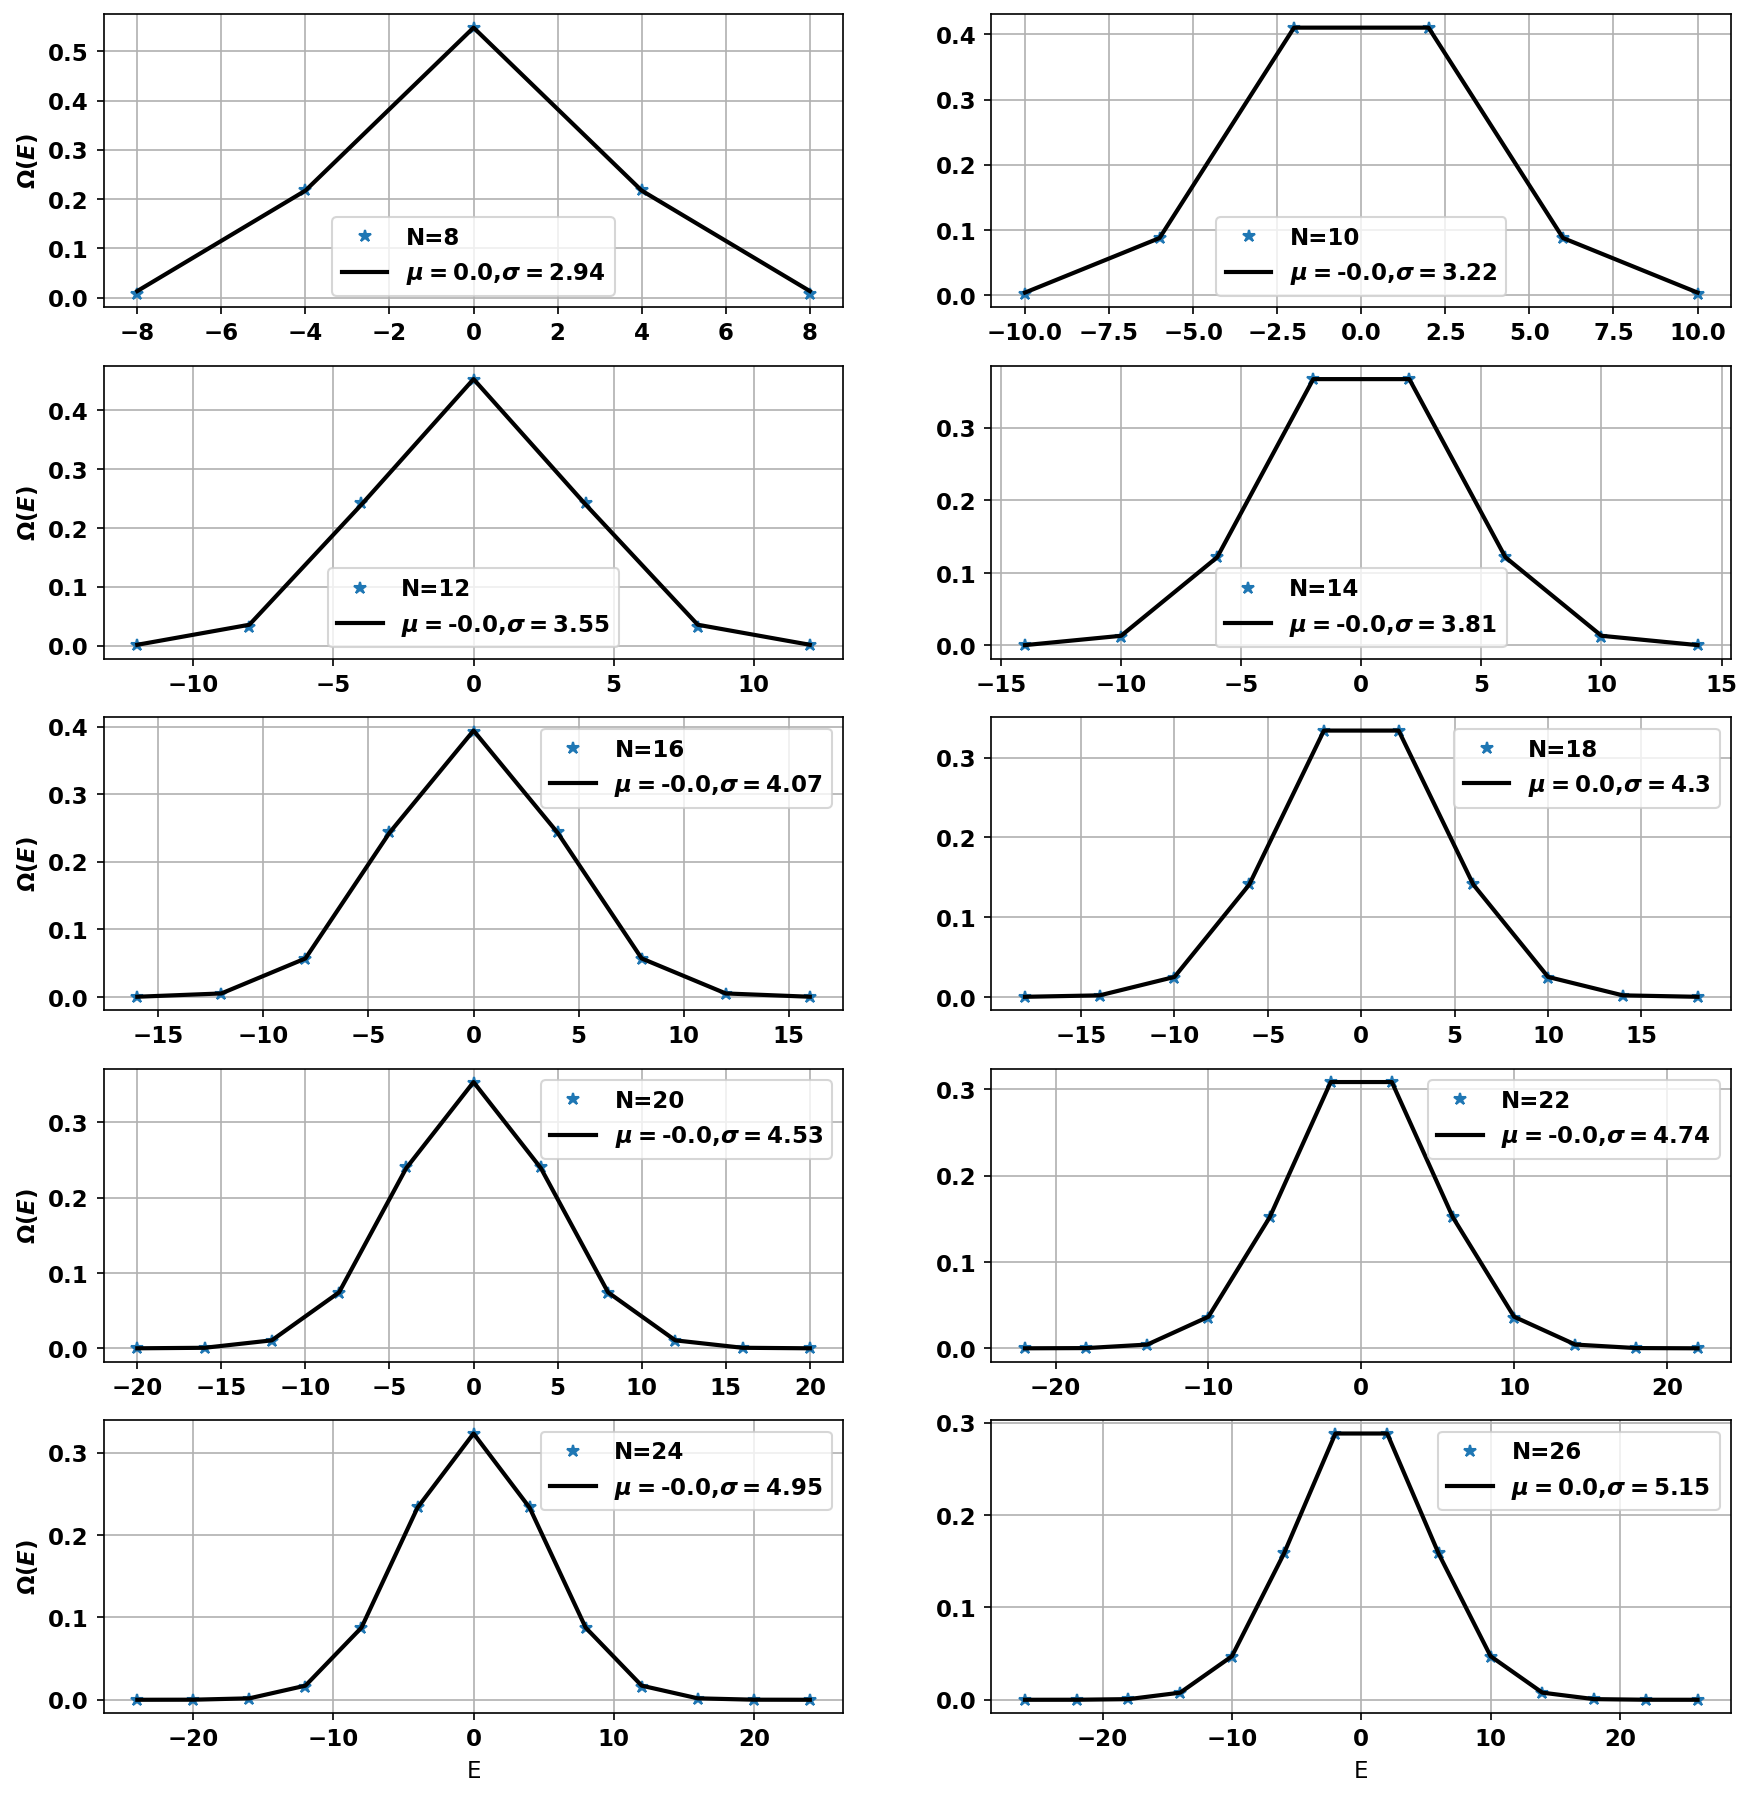

In [68]:
font = {'weight' : 'bold', 'size'   : 11}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 14, 15 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=150)
plt.rcParams['figure.figsize'] = 10,10

desvi=[]
for i in range(1,11):
    K= np.unique(eval('micros'+str(i)), return_counts=True)
    x , y = K[0] , K[1]/sum(K[1])
    
    mej_val, cov = curve_fit(model, x, y)
    desvi.append(mej_val[0])
    fig1 = plt.figure(1)
    ax1 = plt.subplot(5,2,i)
    ax1.plot(x,y,'*',label='N='+str(2*i+6))
    ax1.plot(x,model(x,mej_val[0],mej_val[1],mej_val[2]),lw=2,color='k',label='$\mu=$'+str(round(mej_val[1],2))+','+'$\sigma=$'+str(round(mej_val[0],2)))
    if i==9 or i==10:
        plt.xlabel('E')
    if i==1 or i==3 or i==5 or i==7 or i==9:
        plt.ylabel('$\Omega(E)$')
        
    plt.grid()
    plt.legend()

plt.show()
    
    
    


# Desviación vs N

Text(0, 0.5, '$\\sigma$')

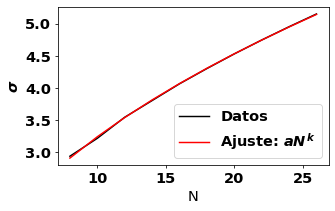

In [71]:
font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 5, 3 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=70)


N=[8,10,12,14,16,18,20,22,24,26]
mej_val, cov = curve_fit(sigm, N, desvi)
plt.plot(N,desvi, 'k',label='Datos')
plt.plot(N,sigm(N,mej_val[0],mej_val[1]), 'r', label='Ajuste: $aN^{k}$')
plt.legend()

plt.xlabel('N')
plt.ylabel('$\sigma$')

In [13]:
mej_val #a, k

array([1.06883459, 0.48211267])

# Función partición

Se calcula la función partición por ambos metodos para la configuración de 16 espines

In [72]:
Temperaturas = [2.0, 2.5, 3.0]

print([Particion(T,micros5) for T in Temperaturas]) # Metodo 1

print([Particion2(T,micros5) for T in Temperaturas])  # Metodo 2

[447840.00940687093, 228116.29502387892, 156882.86702904716]
[447840.00940677844, 228116.29502392065, 156882.86702907138]


# Energía media

Se calcula la energía media para la configuración de 16 átomos

Text(0.5, 1.0, 'Energía media vs Temperatura para N = 20')

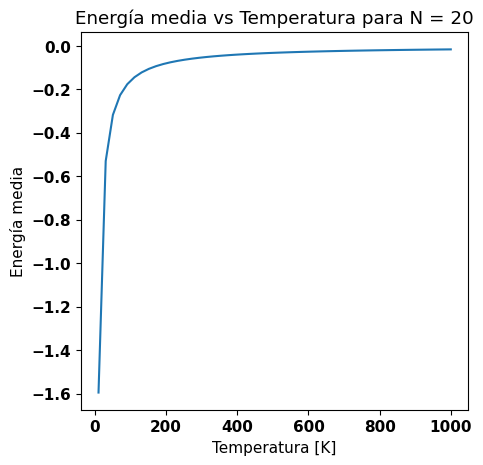

In [20]:
T = np.linspace(10, 1000, 50)
Energiamedia=[]
for i in range(len(T)):
    Energiamedia.append( Emedia(micros5, T[i]) )
font = {'weight' : 'bold', 'size'   : 11}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 5, 5 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=100)
plt.rcParams['figure.figsize'] = 10,10    
plt.plot(T, Energiamedia)
plt.xlabel("Temperatura [K]")
plt.ylabel("Energía media")
plt.title("Energía media vs Temperatura para N = 20")

# Calor especifico

In [46]:
T = np.linspace(0.2, 4.5, 60)
cE_2=[]
cE_3=[]
cE_4=[]
cE_5=[]

for i in range(len(T)):
    cE_2.append(calorEspecifico(micros7, T[i], 20))
    cE_3.append(calorEspecifico(micros8, T[i], 22))
    cE_4.append(calorEspecifico(micros9, T[i], 24))
    cE_5.append(calorEspecifico(micros10, T[i], 26))




In [47]:
cE_2=np.array(cE_2)
cE_3=np.array(cE_3)
cE_4=np.array(cE_4)
cE_5=np.array(cE_5)
tCriticas = [T[cE_2.argmax()], T[cE_3.argmax()], T[cE_4.argmax()], T[cE_5.argmax()]]
print("Las temperatuas críticas son: ", tCriticas)

Las temperatuas críticas son:  [0.7830508474576272, 0.7101694915254237, 0.7101694915254237, 0.7101694915254237]


<Figure size 500x500 with 0 Axes>

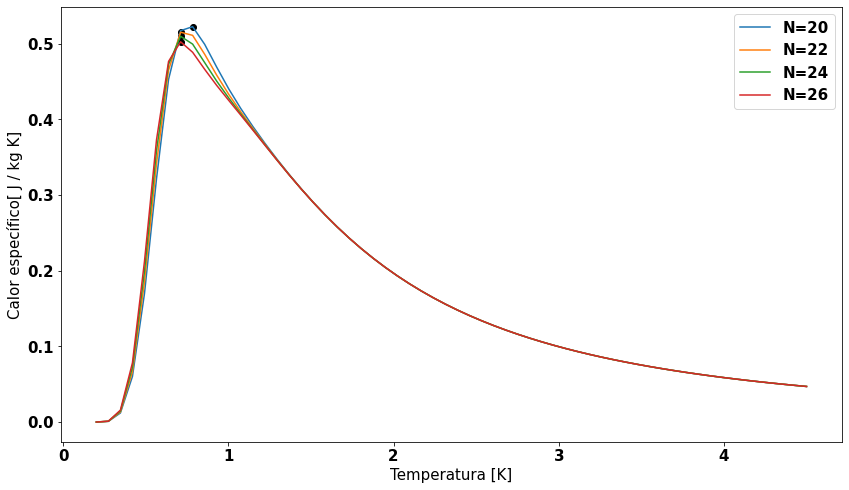

In [49]:
font = {'weight' : 'bold', 'size'   : 15}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 5, 5 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=100)
plt.rcParams['figure.figsize'] = 10,10  


plt.figure(figsize=(14,8))
plt.plot(T, cE_2, label = "N=20")
plt.plot(T, cE_3, label = "N=22")
plt.plot(T, cE_4, label = "N=24")
plt.plot(T, cE_5, label = "N=26")

plt.scatter(tCriticas, [cE_2[cE_2.argmax()], cE_3[cE_3.argmax()], cE_4[cE_4.argmax()], cE_5[cE_5.argmax()]], color="black")
#plt.axvline(x = 2.269)
#plt.text(x=2.31, y=0, s="$T_c$", fontsize=12, bbox=dict(facecolor='blue', alpha=0.1))
plt.xlabel("Temperatura [K]")
plt.ylabel("Calor específico[ J / kg K]")
#plt.title("Calor específico vs Temperatura")
plt.legend()

# Cadenas de Markov en tiempo discreto:  Dinámica de poblaciones.

Que significan las cantidades aX(t) y bX(t). Por que se compara con numeros ´
aleatorios?

aX(t): Probabilidad de nacimiento
bX(t): Probabilidad de muerte

Esto es debido a que X(t) representa la cantidad de personas en el tiempo t y 'a', 'b' representan la densidad de probabilidad de nacimiento y muerte respectivamente. Por tanto, ya que aX(t) y bX(t) reprensentan probabilidades, es de esperarse que sean comparados con números aleatorios.

In [13]:
def poblacion(N,a,b,nsteps): #N Población máxima, a densidad de probabilidad de nacimiento, b densidad de probabilidad de muerte
    # nsteps tiempo máximo 
    x=np.zeros(nsteps)
    x[0]=25 #Població inicial
    for t in range(nsteps-1):
        if 0<x[t]<N-1:
            birth=np.random.rand() <= a*x[t] # Arroja True o False dependiendo del número aleatorio generado
            death=np.random.rand() <= b*x[t] # Arroja True o False dependiendo del número aleatorio generado
            x[t+1]=x[t]+1*birth-1*death # Población en el tiempo t+1 
        else:
            x[t+1]=x[t]
        
    return x

Obtenga una grafica de la población X(t) en funcion de t para tres valores
diferentes de N y paras las tres situaciones siguientes: a) a = b, b) a > b y
a < b. Saque sus propias conclusiones de los diferentes comportamientos.

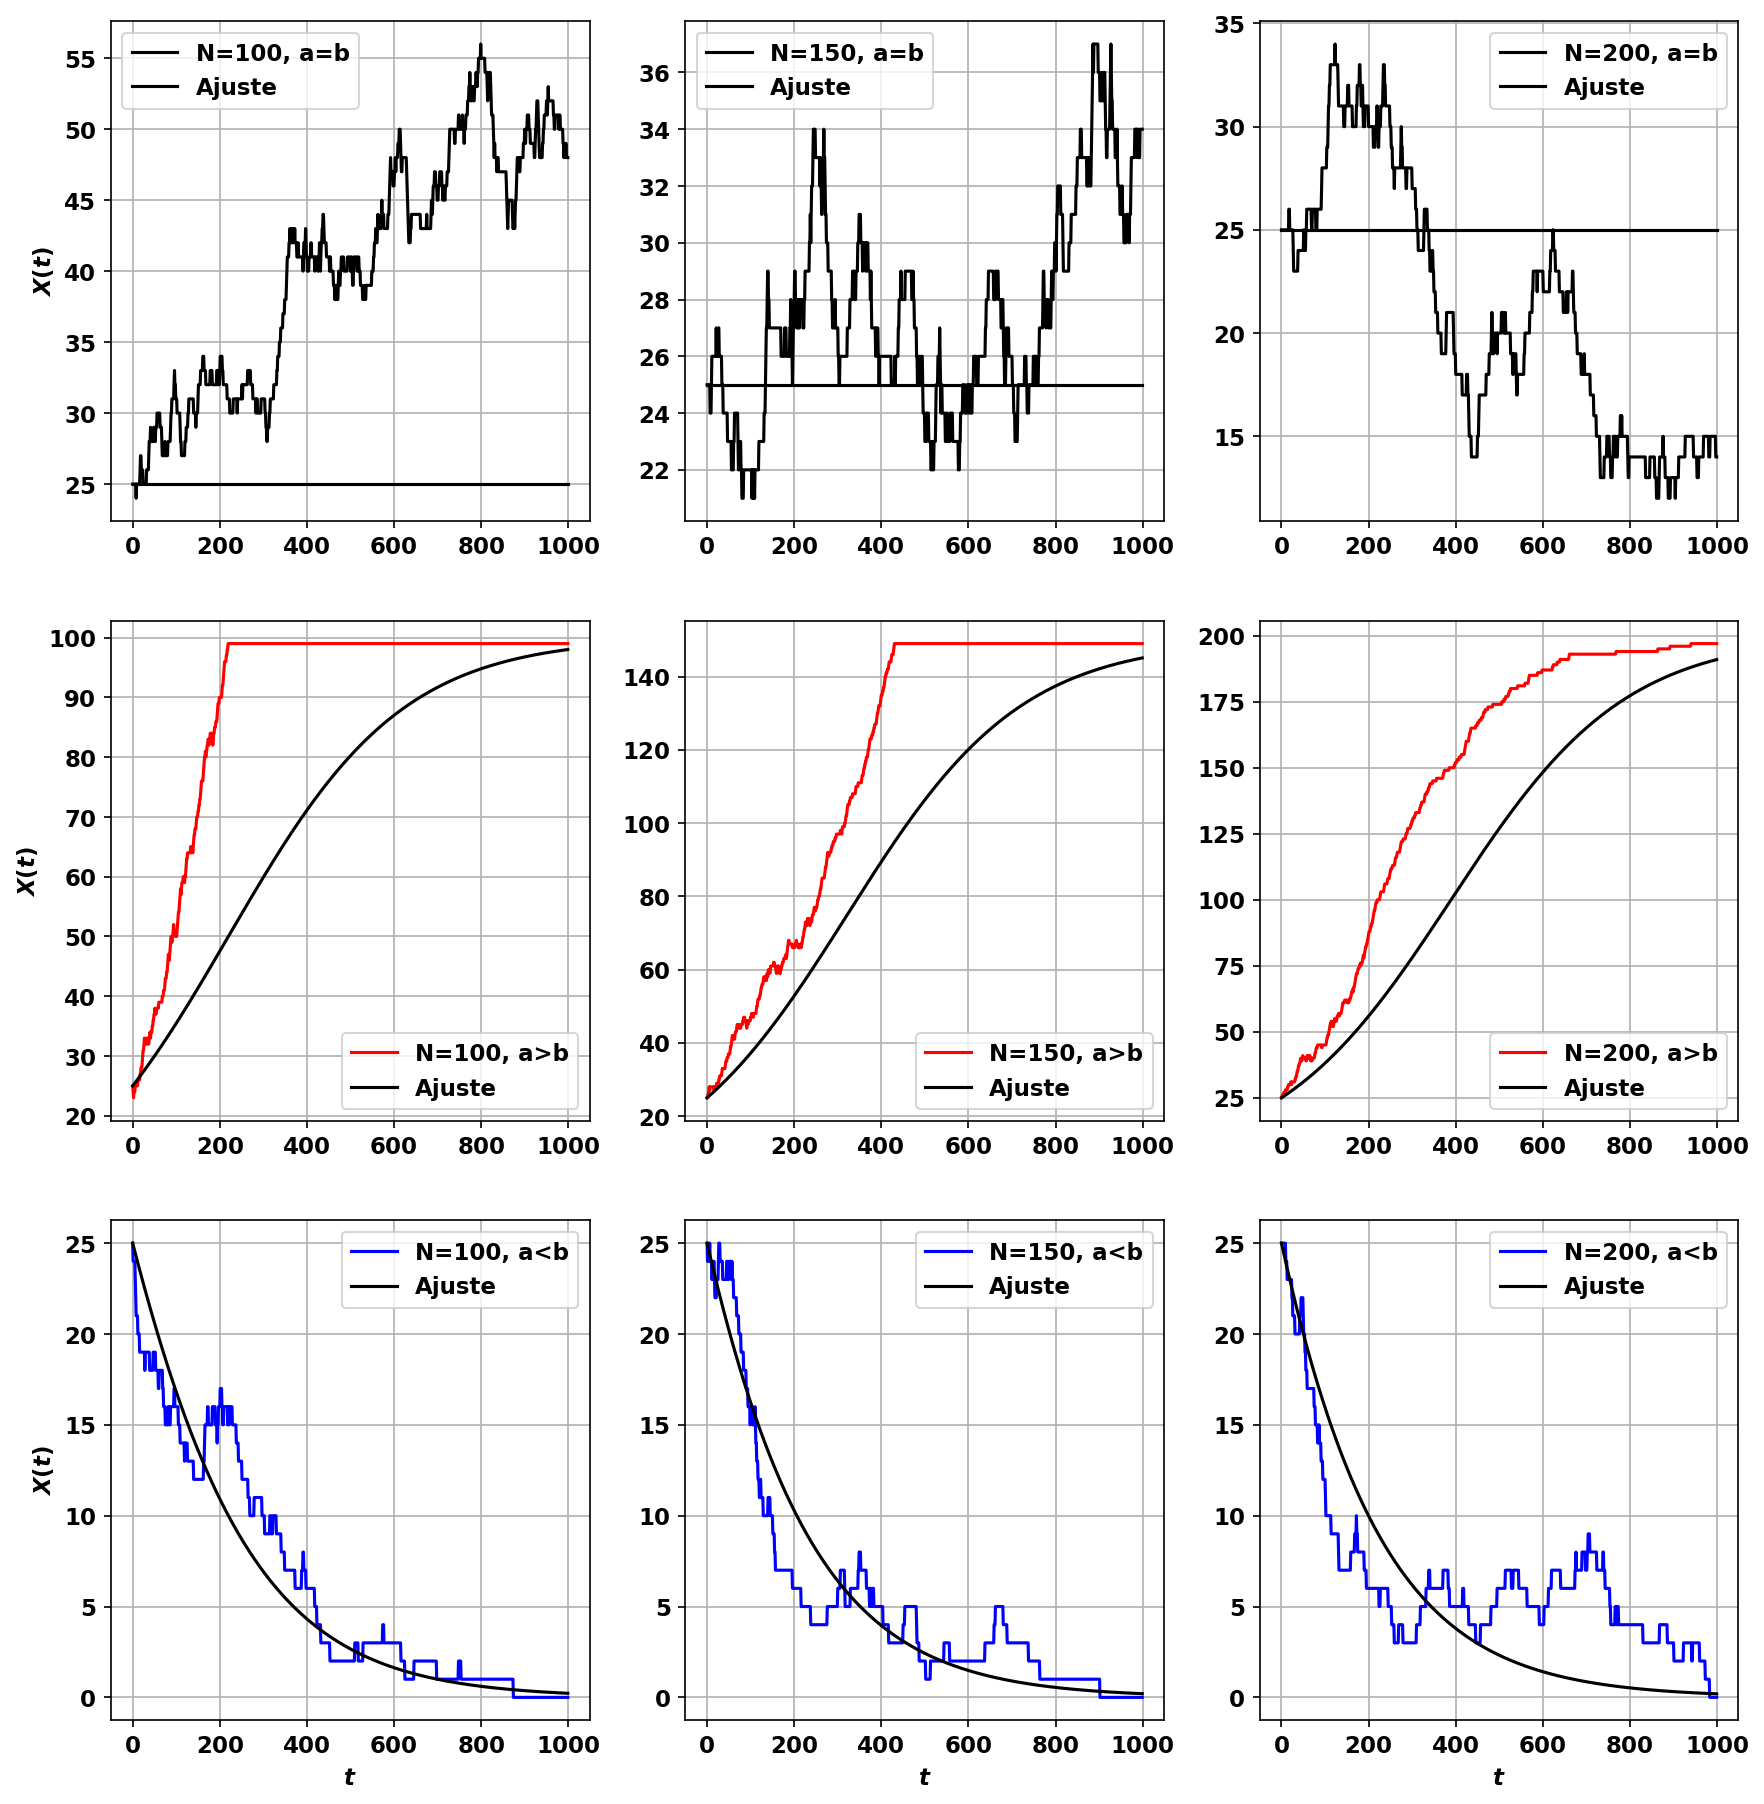

In [52]:
#Tiempo máximo
nsteps=1000
#Poblaciones a utilizar
N1=100
N2=150
N3=200
a1 , b1 = 0.5/N1 ,  0.5/N1  #a=b
a2 , b2 = 1/N1 ,  0.5/N1  #a>b
a3 , b3 = 0.5/N1 ,  1/N1  #a<b
#Ecuación logistica
def ajuste_p(x,x0,a,b,N):
    #a: Tasa de nacimiento
    #b: Tasa de muerte
    #N: población máxima
    #x0: Población inicial
    
    return (N*x0*np.exp((a-b)*x))/(N+x0*(np.exp((a-b)*x)-1))

#Graficos

font = {'weight' : 'bold', 'size'   : 11}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 14, 15 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=150)
plt.rcParams['figure.figsize'] = 10,10

for i in range(1,4):
    
    
    y= poblacion(eval('N'+str(i)),a1,b1,nsteps)
    x=np.zeros(len(y))
    for j in range(len(x)):
        x[j]=j
    fig1 = plt.figure(1)
    ax1 = plt.subplot(3,3,i)
    ax1.plot(x,y,'-k',label='N='+str(eval('N'+str(i)))+', a=b')
    ax1.plot(x,ajuste_p(x,25,a1,b1,eval('N'+str(i))),'-k',label='Ajuste')
    if i==1 :
        plt.ylabel('$X(t)$')
    plt.grid()
    plt.legend()

for i in range(1,4):
    
    
    y= poblacion(eval('N'+str(i)),a2,b2,nsteps)
    x=np.zeros(len(y))
    for j in range(len(x)):
        x[j]=j
    fig1 = plt.figure(1)
    ax1 = plt.subplot(3,3,i+3)
    ax1.plot(x,y,'-r',label='N='+str(eval('N'+str(i)))+', a>b')
    ax1.plot(x,ajuste_p(x,25,a2,b2,eval('N'+str(i))),'-k',label='Ajuste')
    if i==1 :
        plt.ylabel('$X(t)$')
    plt.grid()
    plt.legend()

for i in range(1,4):
    
    
    y= poblacion(eval('N'+str(i)),a3,b3,nsteps)
    x=np.zeros(len(y))
    for j in range(len(x)):
        x[j]=j
    fig1 = plt.figure(1)
    ax1 = plt.subplot(3,3,i+6)
    ax1.plot(x,y,'-b',label='N='+str(eval('N'+str(i)))+', a<b')
    ax1.plot(x,ajuste_p(x,25,a3,b3,eval('N'+str(i))),'-k',label='Ajuste')
    plt.xlabel('$t$')
    if i==1 :
        plt.ylabel('$X(t)$')
    
    plt.grid()
    plt.legend()

        
    


plt.show()
    
    
    


La vectorización se hace a través de la función markov_vec

In [65]:
N=100 #población máxima
a1 , b1 = 0.5/N ,  0.5/N #a=b
ntrials=100 #Cantidad de poblaciones
x=np.random.randint(size=ntrials,low=0,high=N) #Genera números aleatorios entre 0 y 10
nsteps_list=[10,1000,10000] #tiempos

In [66]:

def simulate(x,nsteps):
    
    x1=np.copy(x)
    for _ in range(nsteps-1):
        upd=(0<x1)&(x1<N-1)
        birth=1* (np.random.rand(ntrials)<=a1*x1)
        death=1* (np.random.rand(ntrials)<=b1*x1)
        
        x1[upd]+=birth[upd]-death[upd]
        
    return x1

#Vectorización
def markov_vec(nsteps): 
    vec=[]
    for i in range(len(nsteps)):
        vec.append(simulate(x,nsteps[i]))
    return np.array(vec)
        

# Histogramas

Text(0.5, 1.0, 't=10000')

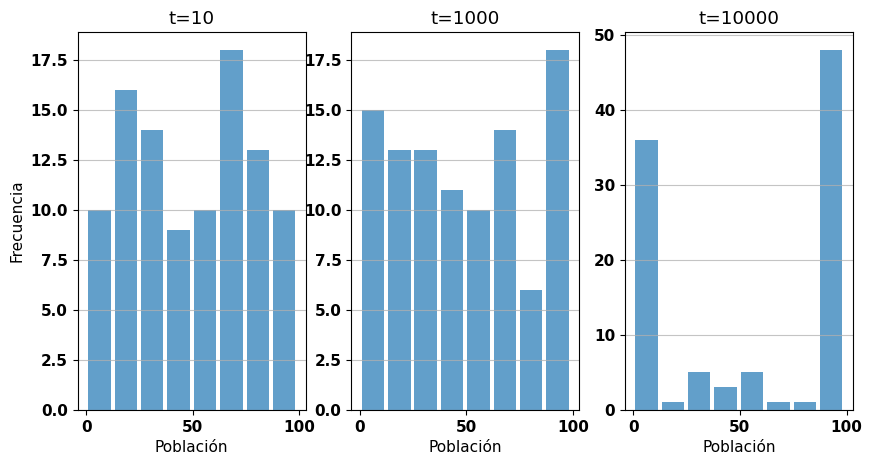

In [68]:
import matplotlib.pyplot as plt

a=markov_vec(nsteps_list)
font = {'weight' : 'bold', 'size'   : 11}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 10, 5 # para modificar el tamaño de la figura
fig1 = plt.figure(dpi=100)


# An "interface" to matplotlib.axes.Axes.hist() method
ax1 = plt.subplot(1,3,1)
n, bins, patches = ax1.hist(a[0], bins='auto',alpha=0.7, rwidth=0.85)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('t=10')

#n, bins, patches = plt.hist(simulate(x,nsteps_list[1]), bins='auto',
                            #alpha=0.7, rwidth=0.85)

#n, bins, patches = plt.hist(simulate(x,nsteps_list[2]), bins='auto',
                            #alpha=0.7, rwidth=0.85)
ax1 = plt.subplot(1,3,2)
n, bins, patches = ax1.hist(a[1], bins='auto',alpha=0.7, rwidth=0.85)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Población')
plt.title('t=1000')

 
ax1 = plt.subplot(1,3,3)
n, bins, patches = ax1.hist(a[2], bins='auto',alpha=0.7, rwidth=0.85)
    
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Población')

plt.title('t=10000')

